In [1]:
# Basic Imports
from omigo_core import tsv
from omigo_ext import graph_ext
import statistics

# some nice display options
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important;}</style>"))
display(HTML("<style>div.output_scroll { height: 60em; }</style>"))

In [2]:
# Install the yfinance package if it is not installed already
# From bash:
# $ pip3 install yfinance
#
# From within notebook:
# import sys
# !{sys.executable} -m pip install yfinance

In [3]:
# Import the yfinance. If you get module not found error the run !pip install yfiannce from your Jupyter notebook 
import yfinance as yf   
 
# Get the data of the stock CRWD 
x = tsv.from_df(yf.download("CRWD", "2010-01-01", "2021-12-31"))
x.sample_n(5).to_df()

[*********************100%***********************]  1 of 1 completed
[WARN]: from_df() api doesnt support reading indexed columns in pandas dataframes yet.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,209.9600067138672,211.44000244140625,195.98500061035156,200.49000549316406,200.49000549316406,6281300
1,2021-02-25,216.42999267578125,221.80599975585938,204.89999389648438,208.66000366210938,208.66000366210938,3604400
2,2019-08-09,90.25,98.0,90.0,94.9000015258789,94.9000015258789,3062200
3,2020-06-30,98.44000244140625,101.37999725341797,97.33000183105469,100.29000091552734,100.29000091552734,5056200
4,2021-07-09,262.9549865722656,265.0,259.6000061035156,264.44000244140625,264.44000244140625,2587000


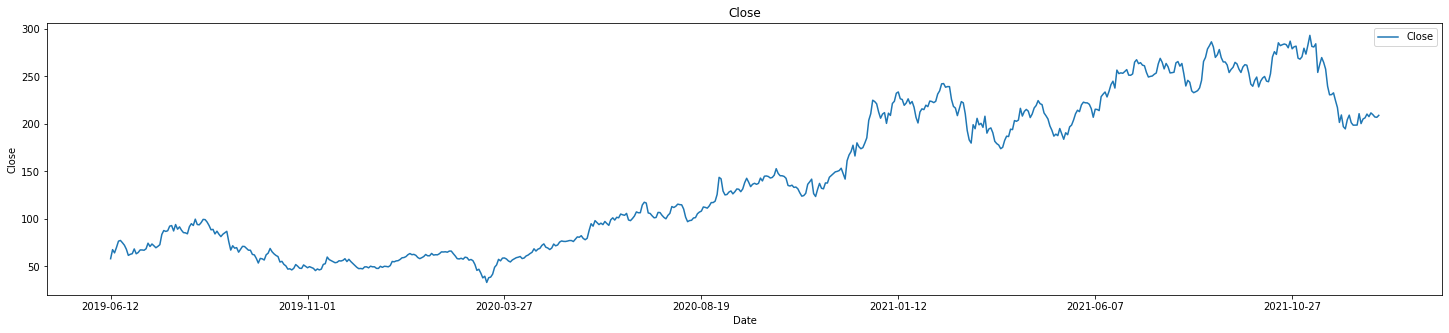

In [4]:
# get the basic trend of stock price
x.extend_class(graph_ext.VisualTSV) \
    .linechart("Date", ["Close"])


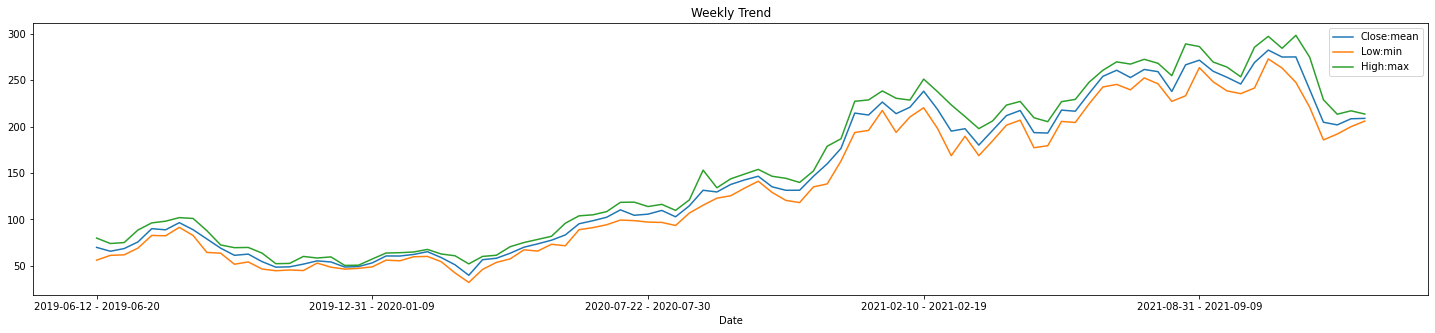

In [5]:
# get weekly mean, low and high using window_aggregate function
x \
    .window_aggregate("Date", ["Close", "Low", "High"], [statistics.mean, min, max], winsize = 7, sliding = False) \
    .extend_class(graph_ext.VisualTSV).linechart("Date", ["Close:mean", "Low:min", "High:max"], title = "Weekly Trend")

In [6]:
x \
    .window_aggregate("Date", ["Close", "Low", "High"], [statistics.mean, min, max], winsize = 7, sliding = False, collapse = False) \
    .to_df()


,Date,Open,High,Low,Close,Adj Close,Volume,Date:window_aggregate,Close:mean,Low:min,High:max
0,2019-06-12,63.5,67.0,56.0,58.0,58.0,19449200,2019-06-12 - 2019-06-20,69.76,56,79.79
1,2019-06-13,63.86000061035156,69.66999816894531,61.599998474121094,67.55999755859375,67.55999755859375,10923900,2019-06-12 - 2019-06-20,69.76,56,79.79
2,2019-06-14,69.77999877929688,70.79000091552734,63.02000045776367,64.16000366210938,64.16000366210938,6264200,2019-06-12 - 2019-06-20,69.76,56,79.79
3,2019-06-17,64.75,70.01000213623047,62.0,70.01000213623047,70.01000213623047,3247500,2019-06-12 - 2019-06-20,69.76,56,79.79
4,2019-06-18,73.0,78.69999694824219,71.5,76.5,76.5,6612600,2019-06-12 - 2019-06-20,69.76,56,79.79
...,...,...,...,...,...,...,...,...,...,...,...
640,2021-12-23,207.60000610351562,213.0,204.64999389648438,211.52000427246094,211.52000427246094,2668200,2021-12-20 - 2021-12-29,208.49,200,217.11
641,2021-12-27,211.47999572753906,217.11000061035156,209.14999389648438,209.63999938964844,209.63999938964844,2737300,2021-12-20 - 2021-12-29,208.49,200,217.11
642,2021-12-28,210.0,210.8699951171875,206.27999877929688,207.22999572753906,207.22999572753906,1518700,2021-12-20 - 2021-12-29,208.49,200,217.11
643,2021-12-29,206.69000244140625,207.42999267578125,201.35000610351562,206.8699951171875,206.8699951171875,1925700,2021-12-20 - 2021-12-29,208.49,200,217.11
